### **Ad Performance Analysis and Prediction**

#### **Introduction**

In the current digital marketing work, businesses allocate a lot of budgests to online advertising across many social media platforms to attract potential customers into buying certain products that they are intentionally trying to show through the ads. However, a common and costly challenge is the inefficient targeting of users as ads are often served to individuals with low or no intent to engage, which can lead to wasted effort, poor return on ad spend, and reduce campaign performance. 


Therefore, the business needs a predictive system that can analyze user data and contextual signals to determine the likelihood of an ad being clicked or not, which we also can improve the ad performance later on by deploying ads to specific customer segments so that we can have high return on ad spend, increasing businesses' branding and revenues. 

#### **Project Objectives**
1. **Develop a supervised machine learning model:** We aim to build a classification model that can predict whether certain users will click the ad or not, so that the businesses can target the right users, potentially converting them to customers.

2. **Generate actionable business insights:** This project aims to explore the raw dataset, and creating new features that can add valuable insights to the analysis to guide businesses or marketing team to target the right users to click the ad. 

3. **Build customer segmentations:** We want to identify distinct group of users on their behavior on clicking the ad or not so that we can also use this as one of the features to predict whether they will click the ad together with another features.

#### **Project Implementation**
In order to build an effective and robust machine learning model, these are the steps that we can follow:

1. **Data Understanding:** Explore the data source, types of features, and understand the meaning of each column. Gain an overview of the dataset and the distribution.

2. **Data Cleaning:** Handle missing values, duplicates, inconsistent data types, and outliers. Ensure data quality before analysis and modeling.

3. **Exploratory Data Analysis:** Visualize distributions, detect patterns, trends, and correlations. Identify potential biases or imbalances.

4. **Feature Engineering:** Create new relevant features, apply transformation, and prepare the features to be ready for modeling. 

5. **Build customer segmentation:** Use clustering to segment users based on features to understand different user types and personalize ads.

6. **Business insights:** Derive actionable insights such as high-conversion user groups, ad formats with higher engagement. 

7. **Model Development:** In this step, it can include multiple steps such as:
    - **Data Preparation:** Normalize/scale features, split data into training, validation, and testing sets, address class imbalance.
    - **Model Training:** Train various classification models, tune hyperparameters, and use cross-validation.
    - **Model Evaluation:** Evaluate using metrics.
    
8. **Conclusion:** Summarize findings, best-performing model, business implications, limitations, and suggest next steps.

#### **Setup**

In [33]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
import missingno as msno

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

# Training and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, roc_auc_score, f1_score, make_scorer

# Hyper-parameter Tuning and Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline 

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Saving the model
import pickle

#### **Read dataset**

In [2]:
# Load the dataset from the CSV file 
df = pd.read_csv("ad_ctr.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


**Note**: This dataset provides insights into user behavior and online advertising, spefically focusing on predicting whether a user will click on an online advertisement. It contains user demographic information, browsing habits, and details related to the dispaly of the advertisement. 

#### **Data Understanding**

In [3]:
# Get to know more about the dataset size and features
print(f"Dataset shape: {df.shape}")
print(f"Dataset features: {df.columns}")
print()
df.info()

Dataset shape: (10000, 10)
Dataset features: Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  

**Inference**: Based on the information above, we can see that there are 10000 total rows and 10 columns within the dataset, containing no null values at all. It is a structured dataset with 9 features and 1 target variable for the prediction. Here are a general overview of the columns in the dataset:

| Column Name               | Data Type | Description                                                                 |
|---------------------------|-----------|-----------------------------------------------------------------------------|
| Daily Time Spent on Site  | float64   | Time (in minutes) the user spent on the site per day.                       |
| Age                       | float64   | Age of the user.                                                            |
| Area Income               | float64   | Average income of the geographical area where the user is located.          |
| Daily Internet Usage      | float64   | Time (in minutes) the user spends on the internet per day.                 |
| Ad Topic Line             | object    | Headline/text of the advertisement displayed to the user.                   |
| City                      | object    | City where the user is located.                                             |
| Gender                    | object    | Gender of the user (Male/Female).                          |
| Country                   | object    | Country where the user is located.                                          |
| Timestamp                 | object    | Date and time when the user interacted with the ad (`YYYY-MM-DD HH:MM:SS`). |
| Clicked on Ad             | int64     | Binary flag (0 or 1) indicating whether the user clicked the ad (`1` = clicked). |

In [4]:
# Check the categorical and numerical features 
cat_features = df.select_dtypes(include=["object"]).columns.to_list()
print(f"Categorical features in the dataset: {cat_features}")

print()

num_features = df.select_dtypes(exclude=["object"]).columns.to_list()
print(f"Numerical features in the dataset: {num_features}")

Categorical features in the dataset: ['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']

Numerical features in the dataset: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']


In [5]:
# Check for missing and duplicated rows
num_of_null = df.isnull().sum()
num_of_duplicated = df.duplicated().sum()
print(f"Number of null values in the dataset: {num_of_null}")
print()
print(f"Number of duplicated rows in the dataset: {num_of_duplicated}")

Number of null values in the dataset: Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Number of duplicated rows in the dataset: 215


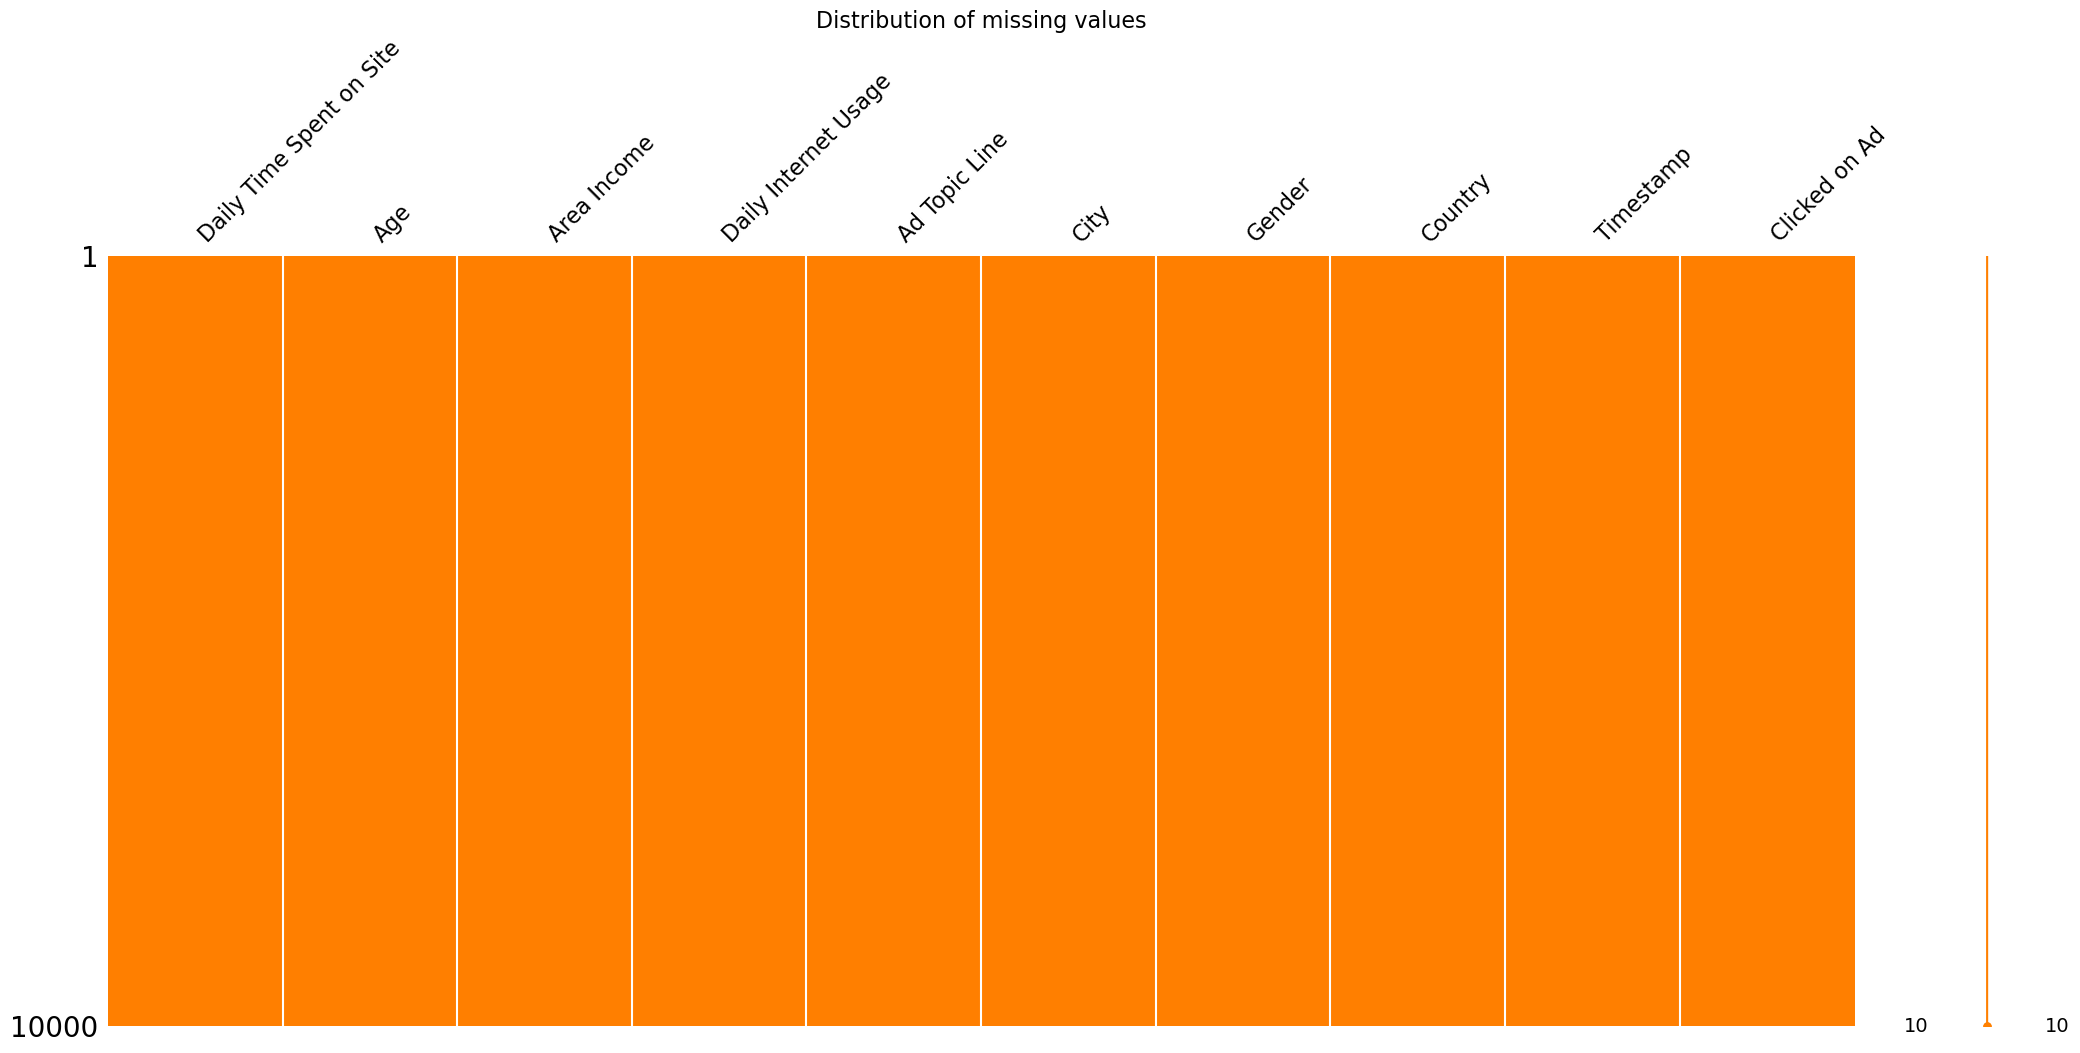

In [15]:
# Use missingno to visualize the distribution of the missing values 
msno.matrix(df, color=(1, 0.5, 0))
plt.title("Distribution of missing values", fontsize=16)
plt.show()

**Finding**: There are no null values in the dataset, which means we do not have to apply any imputation to clean the null values. However, there are duplicated rows within the dataset in total of 215 rows, so we have to delete these duplications later on in the data cleaning part.

In [7]:
# Gain an overview of the descriptive statistics of the dataset
df.describe(include=["float64", "int64"])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [31]:
# Detect outliers using IQR range 
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound

# Check for outliers in the numerical features
for column in num_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    if not outliers.empty:
        print(f"There are outliers in the {column} {len(outliers)} rows")
    else:
        print(f"There are no outliers in the {column} column")

There are no outliers in the Daily Time Spent on Site column
There are no outliers in the Age column
There are outliers in the Area Income 34 rows
There are no outliers in the Daily Internet Usage column
There are no outliers in the Clicked on Ad column


In [ ]:
# Check the outlier range from the lower and upper bounds 
outliers, lower_bound, upper_bound = detect_outliers_iqr(df, "Area Income")
print(f"The lower bound is: {lower_bound}")
print(f"The upper bound is: {upper_bound}")

The lower bound is: 17370.366249999992
The upper bound is: 88522.19625000001


In [51]:
# Define the columns to visualize the box plots
columns = ["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage"]

# Create a subplot grid with 2 rows and 2 columns
fig = go.Figure()
fig = make_subplots(rows=2, cols=2, subplot_titles=columns)
for i, column in enumerate(columns):
    row = i // 2 + 1  
    col = i % 2 + 1   
    fig.add_trace(px.box(df, y=column).data[0], row=row, col=col)
fig.update_layout(title_text="Boxplots of Numerical Features", height=800)
fig.show()

**Finding**: Based on the descriptive table above and the outlier detection function, we have found that:

1. **Outlier detection**: Using the IQR method (1.5×IQR bounds), we identified 34 outlier records in the `Area Income` column (0.34% of total data). No significant outliers were found in other numerical columns.

2. **Outlier characteristics**: Outliers fell between around 14000 (Minimum values) and 17400 (Lower Bound), which can be retained for now because of marginal deviation from the lower bound.

In [8]:
# Check with the categorical features 
df.describe(include=["object"])

,Ad Topic Line,City,Gender,Country,Timestamp
count,10000,10000,10000,10000,10000
unique,559,521,2,207,567
top,Cloned explicit middleware,Hubbardmouth,Female,Australia,2016-03-11 00:05:48
freq,344,336,5376,388,255


In [ ]:
# Check the distribution of the target variable 
y_counts = df["Clicked on Ad"].value_counts().reset_index()
fig = px.bar(y_counts, x="Clicked on Ad", y="count", title="Distribution of Clicked on Ad")
fig.update_layout(xaxis_title="Clicked on Ad", yaxis_title="Count", xaxis_tickvals=[0, 1], 
                  xaxis_ticktext=["Not Clicked", "Clicked"], yaxis_range=[0, y_counts["count"].max() * 1.2])
fig.update_traces(marker_color=["#636EFA", "#EF553B"], text=y_counts["count"], textposition="outside")
fig.show()

In [ ]:
# Check the top 10 most common ad topic lines
df["Ad Topic Line"].value_counts().head(10)

Ad Topic Line
Cloned explicit middleware                       344
Streamlined homogeneous analyzer                 212
Business-focused transitional solution           207
Sharable reciprocal project                      187
Intuitive exuding service-desk                   173
Managed client-server access                     161
Function-based context-sensitive secured line    160
Optimized upward-trending productivity           158
Optional multi-state hardware                    152
Focused coherent success                         145
Name: count, dtype: int64

In [58]:
# Check the top 10 most common city 
df["City"].value_counts().head(10)

City
Hubbardmouth       336
West Brandonton    275
Lisafort           261
Wintersfort        230
Stewartbury        207
Reyesfurt          205
Westshire          186
Wrightburgh        182
New Tinamouth      166
Port Jeffrey       153
Name: count, dtype: int64